In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/its-a-fraud/train.csv
/kaggle/input/its-a-fraud/test.csv
/kaggle/input/its-a-fraud/mock_submission.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

In [3]:
labelencod = preprocessing.LabelEncoder()

In [4]:
sns.set(rc={'figure.figsize':(5,5)})

In [5]:
df_train=pd.read_csv("../input/its-a-fraud/train.csv")  
df_test=pd.read_csv("../input/its-a-fraud/test.csv")  

In [6]:
# concate train and test data set
df=pd.concat([df_train,df_test])

In [7]:
df.shape

(590540, 434)

In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:
df.head()

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        3424175      0.0       11053717           49.00         W   5033   
1        3206179      0.0        5150800           57.95         W   4527   
2        3410455      0.0       10713596          115.95         W   2772   
3        3058578      0.0        1611950          100.00         H  14290   
4        3242131      0.0        6111087           95.00         W  12839   

   card2  card3       card4  card5  card6  addr1  addr2  dist1  dist2  \
0  269.0  150.0  mastercard  224.0  debit  330.0   87.0    6.0    NaN   
1  376.0  150.0        visa  226.0  debit  441.0   87.0    NaN    NaN   
2  512.0  150.0        visa  226.0  debit  143.0   87.0   14.0    NaN   
3  512.0  150.0        visa  226.0  debit  177.0   87.0    NaN    NaN   
4  321.0  150.0        visa  226.0  debit  220.0   87.0    6.0    NaN   

     P_emaildomain R_emaildomain    C1    C2   C3   C4     C5    C6   C7   C8  \
0        gmail.com           NaN   2.0   2.0  0.0  0.0    0.0   1.0  0.0  0.0   
1        gmail.com           NaN   2.0   2.0  0.0  0.0    1.0   2.0  0.0  0.0   
2  centurylink.net           NaN   2.0   1.0  0.0  0.0    1.0   1.0  0.0  0.0   
3        yahoo.com     yahoo.com   1.0   1.0  0.0  1.0    0.0   1.0  0.0  1.0   
4        gmail.com           NaN  84.0  87.0  0.0  0.0  142.0  69.0  0.0  0.0   

     C9  C10   C11  C12    C13   C14     D1     D2   D3     D4   D5   D6  D7  \
0   1.0  0.0   1.0  1.0   21.0   2.0   14.0   14.0  9.0  370.0  9.0  NaN NaN   
1   2.0  0.0   2.0  0.0   14.0   2.0  136.0  136.0  8.0  136.0  8.0  NaN NaN   
2   1.0  0.0   1.0  0.0   14.0   2.0  193.0  193.0  0.0  495.0  0.0  NaN NaN   
3   0.0  1.0   1.0  0.0    1.0   1.0    0.0    NaN  NaN    0.0  NaN  0.0 NaN   
4  48.0  0.0  54.0  0.0  483.0  74.0   35.0   35.0  1.0  566.0  1.0  NaN NaN   

        D8     D9    D10    D11  D12  D13  D14    D15   M1   M2   M3   M4  \
0      NaN    NaN   14.0  351.0  NaN  NaN  NaN  375.0    T    T    T   M0   
1      NaN    NaN  136.0    NaN  NaN  NaN  NaN  136.0  NaN  NaN  NaN  NaN   
2      NaN    NaN  495.0  495.0  NaN  NaN  NaN  495.0    T    T    T  NaN   
3  754.625  0.625    0.0    NaN  NaN  0.0  0.0    0.0  NaN  NaN  NaN  NaN   
4      NaN    NaN   76.0  559.0  NaN  NaN  NaN  559.0    T    T    T   M0   

    M5   M6   M7   M8   M9   V1   V2   V3   V4   V5   V6   V7   V8   V9  V10  \
0    T    F  NaN  NaN  NaN  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0   
1  NaN    F  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2  NaN    T    F    F    T  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4    F    F    F    T    T  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

   V11  V12  V13  V14  V15  V16  V17  V18  V19  V20  V21  V22  V23  V24  V25  \
0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
1  NaN  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
2  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
3  NaN  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
4  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   

   V26  V27  V28  V29  V30  V31  V32  V33  V34  V35  V36  V37  V38  V39  V40  \
0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0   
1  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0   
2  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0   
3  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0   
4  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0   

   V41  V42  V43  V44  V45  V46  V47  V48  V49  V50  V51  V52  V53  V54  V55  \
0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0   
1  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0 

In [10]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 147634
Data columns (total 434 columns):
 #    Column          Non-Null Count   Dtype  
---   ------          --------------   -----  
 0    TransactionID   590540 non-null  int64  
 1    isFraud         442905 non-null  float64
 2    TransactionDT   590540 non-null  int64  
 3    TransactionAmt  590540 non-null  float64
 4    ProductCD       590540 non-null  object 
 5    card1           590540 non-null  int64  
 6    card2           581607 non-null  float64
 7    card3           588975 non-null  float64
 8    card4           588963 non-null  object 
 9    card5           586281 non-null  float64
 10   card6           588969 non-null  object 
 11   addr1           524834 non-null  float64
 12   addr2           524834 non-null  float64
 13   dist1           238269 non-null  float64
 14   dist2           37627 non-null   float64
 15   P_emaildomain   496084 non-null  object 
 16   R_emaildomain   137291 non-null  obj

In [11]:
droplist=[]
for i in df.columns:
    if(df[i].isna().sum()*(100/590540)>90):
        droplist.append(i)

After Droping column having more than 90% value null

In [12]:
droplist

['dist2',
 'D7',
 'id_07',
 'id_08',
 'id_18',
 'id_21',
 'id_22',
 'id_23',
 'id_24',
 'id_25',
 'id_26',
 'id_27']

In [13]:
print("Number of columns droped {}".format((len(droplist))))
print("Number of remaining columns {}".format((434-len(droplist))))

Number of columns droped 12
Number of remaining columns 422


In [14]:
df=df.drop(droplist,axis=1)

## handle object type feature

In [15]:
for column in df:
    if df[column].dtype == 'object':
        print(column)

ProductCD
card4
card6
P_emaildomain
R_emaildomain
M1
M2
M3
M4
M5
M6
M7
M8
M9
id_12
id_15
id_16
id_28
id_29
id_30
id_31
id_33
id_34
id_35
id_36
id_37
id_38
DeviceType
DeviceInfo


#### ProductCD

In [16]:
#null value
df.ProductCD.isna().sum()

0

<AxesSubplot:>

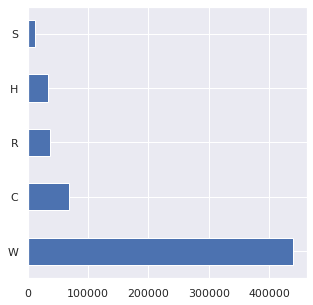

In [17]:
df.ProductCD.value_counts().plot(kind='barh')

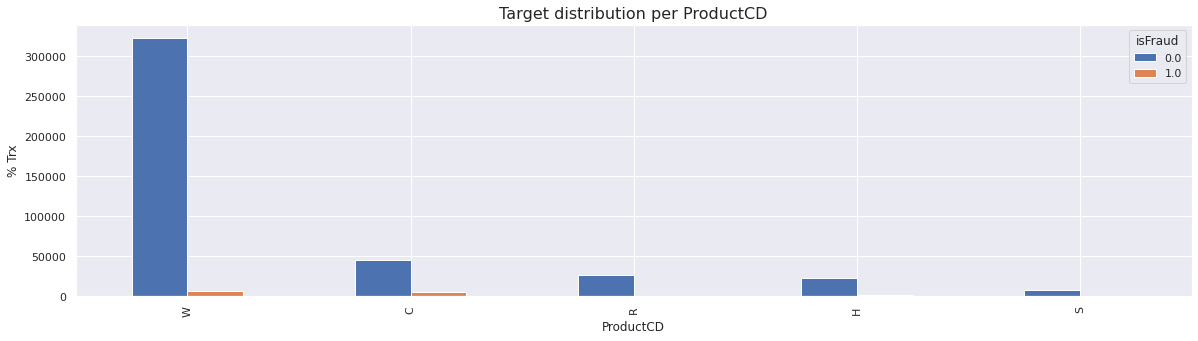


Volume distribution per ProductCD:
        ProductCD   count       percent            Total
isFraud               0.0   1.0     0.0    1.0          
0               C   45251  5993   88.30  11.70   51244.0
3               S    8160   511   94.11   5.89    8671.0
1               H   23551  1190   95.19   4.81   24741.0
2               R   27210  1077   96.19   3.81   28287.0
4               W  323236  6726   97.96   2.04  329962.0


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


In [18]:
product_cd = df.groupby(["ProductCD", "isFraud"]).size().to_frame(name = 'count').reset_index()
count_tb = product_cd[["ProductCD","count"]].groupby(["ProductCD"]).sum().reset_index()

product_merge_percent = pd.merge(product_cd, count_tb, how='left', on='ProductCD')
product_merge_percent['percent'] = round((product_merge_percent['count_x']/product_merge_percent['count_y'])*100,2)
product_merge_percent.columns = ['ProductCD', 'isFraud', 'count', 'total', 'percent']

product_cd_p = pd.pivot_table(product_merge_percent, index = 'ProductCD', columns = 'isFraud', values = 'count')
product_cd_p['Total'] = product_cd_p.sum(axis=1)

product_cd_p_sort = product_cd_p.sort_values(by = ["Total"], ascending=False)
product_cd_p_sort.iloc[:,:-1].plot(kind = 'bar', figsize = (20,5), grid = True)

plt.title('Target distribution per ProductCD'.format(5), fontsize = 16)
plt.ylabel("% Trx")
plt.show()

print_feature_graph_p = pd.pivot_table(product_merge_percent, index = "ProductCD", columns = "isFraud", values = ['count','percent']).reset_index()
print_feature_graph_p['Total'] = print_feature_graph_p.sum(axis=1) - 100
print_feature_graph_p = print_feature_graph_p.sort_values(by = ('percent',1), ascending=False).head(10)

print("\nVolume distribution per {}:".format("ProductCD"))
print(print_feature_graph_p)

#### card4

In [19]:
#null values
df.card4.isna().sum()

1577

<AxesSubplot:>

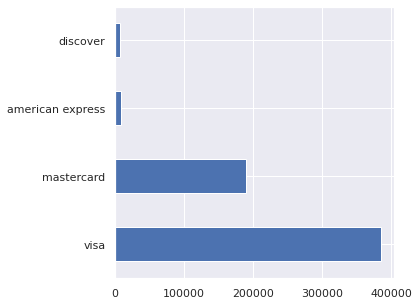

In [20]:
df.card4.value_counts().plot(kind='barh')

In [21]:
#fill null value with mode ("visa")
df["card4"].fillna("visa",inplace=True)

#### card6

In [22]:
#null values
df.card6.isna().sum()

1571

<AxesSubplot:>

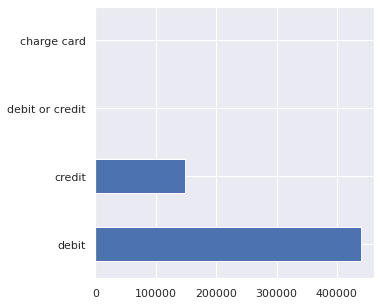

In [23]:
df.card6.value_counts().plot(kind='barh')

In [24]:
#fill null value with mode ("debit")
df["card6"].fillna("debit",inplace=True)

#### P_emaildomain

In [25]:
#null values
df.P_emaildomain.isna().sum()

94456

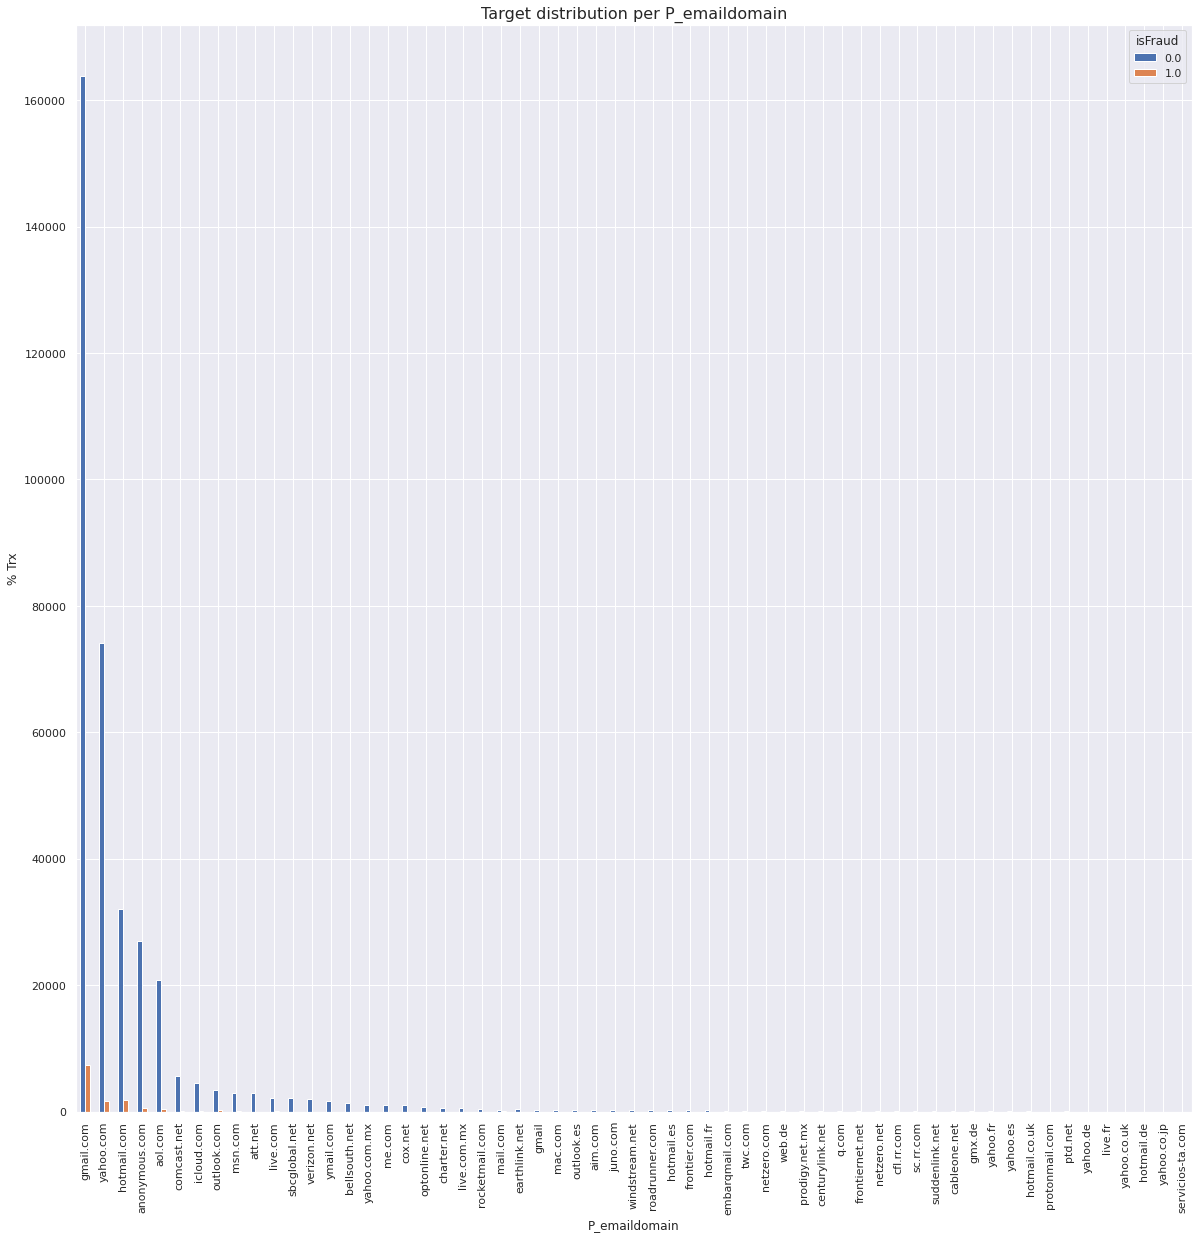


Volume distribution per P_emaildomain:
            P_emaildomain     count         percent            Total
isFraud                         0.0     1.0     0.0    1.0          
16              gmail.com  163752.0  7437.0   95.66   4.34  171189.0
19            hotmail.com   32100.0  1809.0   94.67   5.33   33909.0
53              yahoo.com   74124.0  1726.0   97.72   2.28   75850.0
1           anonymous.com   27070.0   632.0   97.72   2.28   27702.0
2                 aol.com   20778.0   479.0   97.75   2.25   21257.0
35            outlook.com    3404.0   363.0   90.36   9.64    3767.0
9             comcast.net    5647.0   184.0   96.84   3.16    5831.0
23             icloud.com    4589.0   130.0   97.25   2.75    4719.0
29               mail.com     344.0    81.0   80.94  19.06     425.0
31                msn.com    3004.0    68.0   97.79   2.21    3072.0
25               live.com    2236.0    65.0   97.18   2.82    2301.0
36             outlook.es     286.0    47.0   85.89  14.11     

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


In [26]:
product_cd = df.groupby(["P_emaildomain", "isFraud"]).size().to_frame(name = 'count').reset_index()
count_tb = product_cd[["P_emaildomain","count"]].groupby(["P_emaildomain"]).sum().reset_index()

product_merge_percent = pd.merge(product_cd, count_tb, how='left', on='P_emaildomain')
product_merge_percent['percent'] = round((product_merge_percent['count_x']/product_merge_percent['count_y'])*100,2)
product_merge_percent.columns = ['P_emaildomain', 'isFraud', 'count', 'total', 'percent']

product_cd_p = pd.pivot_table(product_merge_percent, index = 'P_emaildomain', columns = 'isFraud', values = 'count')
product_cd_p['Total'] = product_cd_p.sum(axis=1)

product_cd_p_sort = product_cd_p.sort_values(by = ["Total"], ascending=False)
product_cd_p_sort.iloc[:,:-1].plot(kind = 'bar', figsize = (20,20), grid = True)

plt.title('Target distribution per P_emaildomain'.format(5), fontsize = 16)
plt.ylabel("% Trx")
plt.show()

print_feature_graph_p = pd.pivot_table(product_merge_percent, index = "P_emaildomain", columns = "isFraud", values = ['count','percent']).reset_index()
print_feature_graph_p['Total'] = print_feature_graph_p.sum(axis=1) - 100
print_feature_graph_p = print_feature_graph_p.sort_values(by = ('count',1), ascending=False)

print("\nVolume distribution per {}:".format("P_emaildomain"))
print(print_feature_graph_p)

In [27]:
s = df.P_emaildomain.value_counts(normalize=True)
s.head(20)

gmail.com        0.460315
yahoo.com        0.203462
hotmail.com      0.091214
anonymous.com    0.074580
aol.com          0.057025
comcast.net      0.015901
icloud.com       0.012633
outlook.com      0.010272
msn.com          0.008249
att.net          0.008130
live.com         0.006130
sbcglobal.net    0.005987
verizon.net      0.005453
ymail.com        0.004830
bellsouth.net    0.003848
yahoo.com.mx     0.003110
me.com           0.003068
cox.net          0.002808
optonline.net    0.002038
charter.net      0.001645
Name: P_emaildomain, dtype: float64

In [28]:
missing = df['P_emaildomain'].isnull()
missing.head()

0    False
1    False
2    False
3    False
4    False
Name: P_emaildomain, dtype: bool

In [29]:
#distributing null values according to original distribution
df.loc[missing,'P_emaildomain'] = np.random.choice(s.index, size=len(df[missing]),p=s.values)

In [30]:
df.P_emaildomain.isna().sum()

0

In [31]:
df.loc[df["P_emaildomain"].isin(['cfl.rr.com',"gmx.de","hotmail.co.uk","hotmail.de","netzero.com","ptd.net","servicios-ta.com","twc.com","web.de","windstream.net","yahoo.co.jp","yahoo.co.uk"]), "P_emaildomain"] = "goodmail"

In [32]:
#48 categories we handle it using one-hot encoding
df.P_emaildomain.value_counts().shape

(48,)

#### R_emaildomain

In [33]:
#null values
df.R_emaildomain.isna().sum()

453249

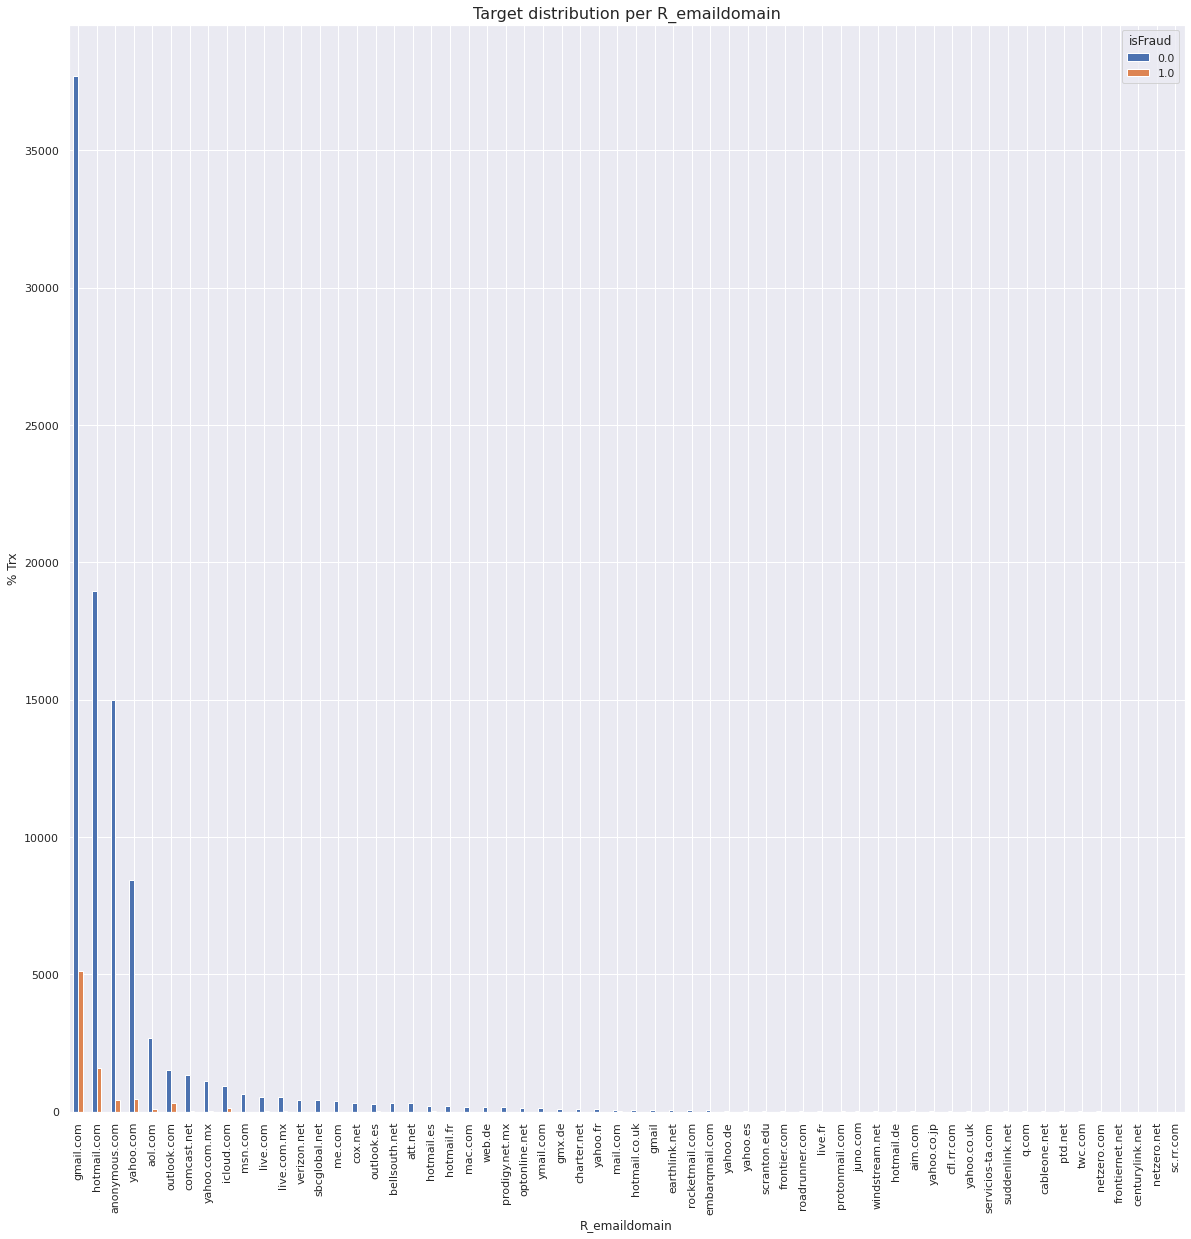


Volume distribution per R_emaildomain:
            R_emaildomain    count         percent           Total
isFraud                        0.0     1.0     0.0    1.0         
16              gmail.com  37685.0  5131.0   88.02  11.98  42816.0
19            hotmail.com  18940.0  1596.0   92.23   7.77  20536.0
54              yahoo.com   8445.0   459.0   94.85   5.15   8904.0
1           anonymous.com  14980.0   441.0   97.14   2.86  15421.0
35            outlook.com   1519.0   315.0   82.82  17.18   1834.0
23             icloud.com    923.0   127.0   87.90  12.10   1050.0
2                 aol.com   2680.0   101.0   96.37   3.63   2781.0
36             outlook.es    281.0    47.0   85.67  14.33    328.0
29               mail.com     55.0    36.0   60.44  39.56     91.0
38         protonmail.com      1.0    34.0    2.86  97.14     35.0
26            live.com.mx    537.0    31.0   94.54   5.46    568.0
25               live.com    545.0    27.0   95.28   4.72    572.0
9             comcast.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


In [34]:
product_cd = df.groupby(["R_emaildomain", "isFraud"]).size().to_frame(name = 'count').reset_index()
count_tb = product_cd[["R_emaildomain","count"]].groupby(["R_emaildomain"]).sum().reset_index()

product_merge_percent = pd.merge(product_cd, count_tb, how='left', on='R_emaildomain')
product_merge_percent['percent'] = round((product_merge_percent['count_x']/product_merge_percent['count_y'])*100,2)
product_merge_percent.columns = ['R_emaildomain', 'isFraud', 'count', 'total', 'percent']

product_cd_p = pd.pivot_table(product_merge_percent, index = 'R_emaildomain', columns = 'isFraud', values = 'count')
product_cd_p['Total'] = product_cd_p.sum(axis=1)

product_cd_p_sort = product_cd_p.sort_values(by = ["Total"], ascending=False)
product_cd_p_sort.iloc[:,:-1].plot(kind = 'bar', figsize = (20,20), grid = True)

plt.title('Target distribution per R_emaildomain'.format(5), fontsize = 16)
plt.ylabel("% Trx")
plt.show()

print_feature_graph_p = pd.pivot_table(product_merge_percent, index = "R_emaildomain", columns = "isFraud", values = ['count','percent']).reset_index()
print_feature_graph_p['Total'] = print_feature_graph_p.sum(axis=1) - 100
print_feature_graph_p = print_feature_graph_p.sort_values(by = ('count',1), ascending=False)

print("\nVolume distribution per {}:".format("R_emaildomain"))
print(print_feature_graph_p)

In [35]:
s = df.R_emaildomain.value_counts(normalize=True)
missing = df['R_emaildomain'].isnull()
df.loc[missing,'R_emaildomain'] = np.random.choice(s.index, size=len(df[missing]),p=s.values)

In [36]:
df.loc[df["R_emaildomain"].isin(["aim.com","att.net","cableone.net","centurylink.net","cfl.rr.com","embarqmail.com","frontier.com","frontiernet.net","gmail","gmx.de","hotmail.co.uk","hotmail.de","hotmail.fr","juno.com","live.fr","netzero.com","ptd.net","q.com","roadrunner.com","sbcglobal.net","sc.rr.com","scranton.edu","servicios-ta.com","twc.com","verizon.net","web.de","windstream.net","yahoo.co.jp","yahoo.co.uk","yahoo.de"]), "R_emaildomain"] = "goodmail"

In [37]:
#null values
df.R_emaildomain.isna().sum()

0

#### M1

In [38]:
#null values
df.M1.isna().sum()

271100

In [39]:
df.M1.value_counts()

T    319415
F        25
Name: M1, dtype: int64

In [40]:
df["M1"].fillna("T",inplace=True)

In [41]:
df["M1"]= labelencod.fit_transform(df["M1"])   


#### M2

In [42]:
print(df.M2.isna().sum())
print(df.M2.value_counts())

271100
T    285468
F     33972
Name: M2, dtype: int64


In [43]:
s = df.M2.value_counts(normalize=True)
missing = df['M2'].isnull()
df.loc[missing,'M2'] = np.random.choice(s.index, size=len(df[missing]),p=s.values)

In [44]:
df["M2"]= labelencod.fit_transform(df["M2"])   

#### M3

In [45]:
print(df.M3.isna().sum())
print(df.M3.value_counts())

271100
T    251731
F     67709
Name: M3, dtype: int64


In [46]:
s = df.M3.value_counts(normalize=True)
missing = df['M3'].isnull()
df.loc[missing,'M3'] = np.random.choice(s.index, size=len(df[missing]),p=s.values)

In [47]:
df["M3"]= labelencod.fit_transform(df["M3"])   

#### M4

In [48]:
print(df.M4.isna().sum())
print(df.M4.value_counts())

281444
M0    196405
M2     59865
M1     52826
Name: M4, dtype: int64


In [49]:
s = df.M4.value_counts(normalize=True)
missing = df['M4'].isnull()
df.loc[missing,'M4'] = np.random.choice(s.index, size=len(df[missing]),p=s.values)

#### M5

In [50]:
print(df.M5.isna().sum())
print(df.M5.value_counts())

350482
F    132491
T    107567
Name: M5, dtype: int64


In [51]:
s = df.M5.value_counts(normalize=True)
missing = df['M5'].isnull()
df.loc[missing,'M5'] = np.random.choice(s.index, size=len(df[missing]),p=s.values)

In [52]:
df["M5"]= labelencod.fit_transform(df["M5"]) 

#### M6

In [53]:
print(df.M6.isna().sum())
print(df.M6.value_counts())

169360
F    227856
T    193324
Name: M6, dtype: int64


In [54]:
s = df.M6.value_counts(normalize=True)
missing = df['M6'].isnull()
df.loc[missing,'M6'] = np.random.choice(s.index, size=len(df[missing]),p=s.values)

In [55]:
df["M6"]= labelencod.fit_transform(df["M6"])   

#### M7

In [56]:
print(df.M7.isna().sum())
print(df.M7.value_counts())

346265
F    211374
T     32901
Name: M7, dtype: int64


In [57]:
s = df.M7.value_counts(normalize=True)
missing = df['M7'].isnull()
df.loc[missing,'M7'] = np.random.choice(s.index, size=len(df[missing]),p=s.values)

In [58]:
df["M7"]= labelencod.fit_transform(df["M7"])   

#### M8

In [59]:
print(df.M8.isna().sum())
print(df.M8.value_counts())

346252
F    155251
T     89037
Name: M8, dtype: int64


In [60]:
s = df.M8.value_counts(normalize=True)
missing = df['M8'].isnull()
df.loc[missing,'M8'] = np.random.choice(s.index, size=len(df[missing]),p=s.values)

In [61]:
df["M8"]= labelencod.fit_transform(df["M8"])   

#### M9

In [62]:
print(df.M9.isna().sum())
print(df.M9.value_counts())

346252
T    205656
F     38632
Name: M9, dtype: int64


In [63]:
s = df.M9.value_counts(normalize=True)
missing = df['M9'].isnull()
df.loc[missing,'M9'] = np.random.choice(s.index, size=len(df[missing]),p=s.values)

In [64]:
df["M9"]= labelencod.fit_transform(df["M9"])   

#### id12

In [65]:
print(df.id_12.isna().sum())
print(df.id_12.value_counts())

446307
NotFound    123025
Found        21208
Name: id_12, dtype: int64


In [66]:
s = df.id_12.value_counts(normalize=True)
missing = df['id_12'].isnull()
df.loc[missing,'id_12'] = np.random.choice(s.index, size=len(df[missing]),p=s.values)

In [67]:
df["id_12"]= labelencod.fit_transform(df["id_12"])  

#### id_15

In [68]:
print(df.id_15.isna().sum())
print(df.id_15.value_counts())

449555
Found      67728
New        61612
Unknown    11645
Name: id_15, dtype: int64


In [69]:
s = df.id_15.value_counts(normalize=True)
missing = df['id_15'].isnull()
df.loc[missing,'id_15'] = np.random.choice(s.index, size=len(df[missing]),p=s.values)

In [70]:
df["id_15"]= labelencod.fit_transform(df["id_15"])  

#### id_16

In [71]:
print(df.id_16.isna().sum())
print(df.id_16.value_counts())

461200
Found       66324
NotFound    63016
Name: id_16, dtype: int64


In [72]:
s = df.id_16.value_counts(normalize=True)
missing = df['id_16'].isnull()
df.loc[missing,'id_16'] = np.random.choice(s.index, size=len(df[missing]),p=s.values)

In [73]:
df["id_16"]= labelencod.fit_transform(df["id_16"])  

#### id_28

In [74]:
print(df.id_28.isna().sum())
print(df.id_28.value_counts())

449562
Found    76232
New      64746
Name: id_28, dtype: int64


In [75]:
s = df.id_28.value_counts(normalize=True)
missing = df['id_28'].isnull()
df.loc[missing,'id_28'] = np.random.choice(s.index, size=len(df[missing]),p=s.values)

In [76]:
df["id_28"]= labelencod.fit_transform(df["id_28"])  

#### id_29

In [77]:
print(df.id_29.isna().sum())
print(df.id_29.value_counts())

449562
Found       74926
NotFound    66052
Name: id_29, dtype: int64


In [78]:
s = df.id_29.value_counts(normalize=True)
missing = df['id_29'].isnull()
df.loc[missing,'id_29'] = np.random.choice(s.index, size=len(df[missing]),p=s.values)

In [79]:
df["id_29"]= labelencod.fit_transform(df["id_29"])  

#### id_30

In [80]:
print(df.id_30.isna().sum())
print(df.id_30.value_counts())

512975
Windows 10          21155
Windows 7           13110
iOS 11.2.1           3722
iOS 11.1.2           3699
Android 7.0          2871
Mac OS X 10_12_6     2559
Mac OS X 10_11_6     2348
iOS 11.3.0           2016
Windows 8.1          1914
Mac OS X 10_10_5     1651
iOS 11.2.6           1647
iOS 10.3.3           1558
Mac OS X 10_13_2     1421
Mac OS X 10_13_1     1211
iOS 11.2.5           1200
Linux                1136
Android              1079
iOS 11.2.2            902
Mac OS X 10_13_3      860
iOS 11.2.0            852
Mac OS X 10_13_4      759
iOS 11.1.1            700
iOS 11.0.3            659
Android 7.1.1         630
Mac OS X 10_9_5       570
Android 6.0.1         566
iOS 10.3.2            428
iOS 9.3.5             414
Android 5.1.1         350
Android 8.0.0         343
Mac                   303
Mac OS X 10.13        287
iOS 10.2.1            285
iOS                   274
iOS 11.1.0            271
Windows Vista         246
iOS 10.3.1            236
Mac OS X 10.12        218
Mac O

In [81]:
df.loc[df["id_30"].isin(["Windows 10","Windows 7","Windows 8.1","Windows Vista","Windows 8","Windows XP","Windows"]), "id_30"] = "Windows"
df.loc[df["id_30"].isin(["iOS 11.2.1","iOS 11.1.2","iOS 11.3.0","iOS 11.2.6","iOS 10.3.3","iOS 11.2.5","iOS 11.2.2","iOS 11.2.0","iOS 11.1.1","iOS 11.0.3","iOS 10.3.2","iOS 9.3.5","iOS 10.2.1","iOS","iOS 11.1.0","iOS 10.3.1","iOS 11.0.2","iOS 10.2.0","iOS 11.0.0","iOS 11.3.1","iOS 11.0.1","iOS 10.1.1","iOS 10.0.2","iOS 11.4.0","iOS 11.4.1"]), "id_30"] = "iOS"
df.loc[df["id_30"].isin(["Android","Android 7.0","Android 7.1.1","Android 6.0.1","Android 5.1.1","Android 8.0.0","Android 8.1.0","Android 6.0","Android 4.4.2","Android 5.0.2","Android 5.0","Android 7.1.2","other","func"]), "id_30"] = "Android"
df.loc[df["id_30"].isin(["Mac OS X 10_12_6","Mac OS X 10_11_6","Mac OS X 10_10_5","Mac OS X 10_13_2","Mac OS X 10_13_1","Linux","Mac OS X 10_13_3","Mac OS X 10_13_4","Mac OS X 10_9_5","Mac","Mac OS X 10.13","Mac OS X 10.12","Mac OS X 10_12_5","Mac OS X 10.11","Mac OS X 10.10","Mac OS X 10_12_4","Mac OS X 10_12_3","Mac OS X 10_7_5","Mac OS X 10_11_5","Mac OS X 10_8_5 ","Mac OS X 10.9","Mac OS X 10_11_3","Mac OS X 10_11_4","Mac OS X 10_6_8","Mac OS X 10.6","Mac OS X 10_12","Mac OS X 10_12_1","Mac OS X 10_12_2","Mac OS X 10_13_5"]), "id_30"] = "MacOS"

In [82]:
s = df.id_30.value_counts(normalize=True)
missing = df['id_30'].isnull()
df.loc[missing,'id_30'] = np.random.choice(s.index, size=len(df[missing]),p=s.values)

#### id_31

In [83]:
print(df.id_31.isna().sum())
print(df.id_31.value_counts())

450258
chrome 63.0                       22000
mobile safari 11.0                13423
mobile safari generic             11474
ie 11.0 for desktop                9030
safari generic                     8195
chrome 62.0                        7182
chrome 65.0                        6871
chrome 64.0                        6711
chrome 63.0 for android            5806
chrome generic                     4778
chrome 66.0                        4264
edge 16.0                          4188
chrome 64.0 for android            3473
chrome 65.0 for android            3336
firefox 57.0                       3315
mobile safari 10.0                 2779
chrome 66.0 for android            2349
chrome 62.0 for android            2097
edge 15.0                          1600
chrome generic for android         1158
firefox 59.0                       1099
samsung browser 6.2                1061
firefox 58.0                        833
chrome 49.0                         719
firefox                          

In [84]:
s = df.id_31.value_counts(normalize=True)
missing = df['id_31'].isnull()
df.loc[missing,'id_31'] = np.random.choice(s.index, size=len(df[missing]),p=s.values)

In [85]:
chrome=[]
safari=[]
firefox=[]
other=[]
for i in df.id_31.unique():
    if("chrome" in i):
        chrome.append(i)
    elif("safari" in i):
        safari.append(i)
    elif("firefox" in i):
        firefox.append(i)
    else:
        other.append(i)

In [86]:
df.loc[df["id_31"].isin(chrome), "id_31"] = "chrome"
df.loc[df["id_31"].isin(safari), "id_31"] = "safari"
df.loc[df["id_31"].isin(firefox), "id_31"] = "firefox"
df.loc[df["id_31"].isin(other), "id_31"] = "other"

#### id_33

In [87]:
print(df.id_33.isna().sum())
print(df.id_33.value_counts())

517251
1920x1080    16874
1366x768      8605
1334x750      6447
2208x1242     4900
1440x900      4384
1600x900      3510
2048x1536     3482
1280x800      2149
2560x1600     2093
2560x1440     1865
2880x1800     1756
1280x1024     1743
1680x1050     1727
1136x640      1712
2436x1125     1484
1280x720      1318
1920x1200     1056
2001x1125     1020
1024x768       824
2220x1080      544
5120x2880      397
3360x2100      380
2732x2048      354
1366x767       335
3840x2160      263
855x480        250
2736x1824      241
1360x768       224
4096x2304      208
2224x1668      194
2220x1081      176
2160x1440      168
2961x1442      157
3200x1800      124
2560x1080      103
2562x1442       99
1600x1200       97
1280x768        90
3000x2000       88
1024x600        88
1280x1025       82
1152x864        79
3440x1440       76
801x480         64
2400x1350       62
2672x1440       58
960x540         58
1919x1079       57
1365x768        52
1919x1080       51
2048x1152       51
2960x1440       47
1921x

In [88]:
df.drop(["id_33"],axis=1,inplace=True)

#### id_34

In [89]:
print(df.id_34.isna().sum())
print(df.id_34.value_counts())

512735
match_status:2     60011
match_status:1     17376
match_status:0       415
match_status:-1        3
Name: id_34, dtype: int64


In [90]:
s = df.id_34.value_counts(normalize=True)
missing = df['id_34'].isnull()
df.loc[missing,'id_34'] = np.random.choice(s.index, size=len(df[missing]),p=s.values)

In [91]:
df["id_34"]= labelencod.fit_transform(df["id_34"])  

#### id_35

In [92]:
print(df.id_35.isna().sum())
print(df.id_35.value_counts())

449555
T    77814
F    63171
Name: id_35, dtype: int64


In [93]:
s = df.id_35.value_counts(normalize=True)
missing = df['id_35'].isnull()
df.loc[missing,'id_35'] = np.random.choice(s.index, size=len(df[missing]),p=s.values)

In [94]:
df["id_35"]= labelencod.fit_transform(df["id_35"])  

#### id 36

In [95]:
print(df.id_36.isna().sum())
print(df.id_36.value_counts())

449555
F    134066
T      6919
Name: id_36, dtype: int64


In [96]:
s = df.id_36.value_counts(normalize=True)
missing = df['id_36'].isnull()
df.loc[missing,'id_36'] = np.random.choice(s.index, size=len(df[missing]),p=s.values)

In [97]:
df["id_36"]= labelencod.fit_transform(df["id_36"])  

#### id_37

In [98]:
print(df.id_37.isna().sum())
print(df.id_37.value_counts())

449555
T    110452
F     30533
Name: id_37, dtype: int64


In [99]:
s = df.id_37.value_counts(normalize=True)
missing = df['id_37'].isnull()
df.loc[missing,'id_37'] = np.random.choice(s.index, size=len(df[missing]),p=s.values)

In [100]:
df["id_37"]= labelencod.fit_transform(df["id_37"])  

#### id_38

In [101]:
print(df.id_38.isna().sum())
print(df.id_38.value_counts())

449555
F    73922
T    67063
Name: id_38, dtype: int64


In [102]:
s = df.id_38.value_counts(normalize=True)
missing = df['id_38'].isnull()
df.loc[missing,'id_38'] = np.random.choice(s.index, size=len(df[missing]),p=s.values)

In [103]:
df["id_38"]= labelencod.fit_transform(df["id_38"])  

#### DeviceType

In [104]:
print(df.DeviceType.isna().sum())
print(df.DeviceType.value_counts())

449730
desktop    85165
mobile     55645
Name: DeviceType, dtype: int64


In [105]:
s = df.DeviceType.value_counts(normalize=True)
missing = df['DeviceType'].isnull()
df.loc[missing,'DeviceType'] = np.random.choice(s.index, size=len(df[missing]),p=s.values)

In [106]:
df["DeviceType"]= labelencod.fit_transform(df["DeviceType"])  

#### DeviceInfo

In [107]:
print(df.DeviceInfo.isna().sum())
print(df.DeviceInfo.value_counts())

471874
Windows                                        47722
iOS Device                                     19782
MacOS                                          12573
Trident/7.0                                     7440
rv:11.0                                         1901
rv:57.0                                          962
SM-J700M Build/MMB29K                            549
SM-G610M Build/MMB29K                            461
SM-G531H Build/LMY48B                            410
rv:59.0                                          362
SM-G935F Build/NRD90M                            334
SM-G955U Build/NRD90M                            328
SM-G532M Build/MMB29T                            316
ALE-L23 Build/HuaweiALE-L23                      312
SM-G950U Build/NRD90M                            290
SM-G930V Build/NRD90M                            274
rv:58.0                                          269
rv:52.0                                          256
SAMSUNG                                

In [108]:
df.drop(["DeviceInfo"],axis=1,inplace=True)

#### we will handle categorical columns ProductCD, card4, card6, P_emaildomain,R_emaildomain, M4,id_30,id_31

In [109]:
# generate binary values using get_dummies
df = pd.get_dummies(df, columns=["ProductCD","card4","card6","P_emaildomain","R_emaildomain","M4","id_30","id_31"], prefix=["ProductCD_is","card4_is","card6_is","P_emaildomain_is","R_emaildomain_is","M4","id_30","id_31"] )
# merge with main df bridge_df on key values

In [110]:
df.head()

TransactionID  isFraud  TransactionDT  TransactionAmt  card1  card2  card3  \
0        3424175      0.0       11053717           49.00   5033  269.0  150.0   
1        3206179      0.0        5150800           57.95   4527  376.0  150.0   
2        3410455      0.0       10713596          115.95   2772  512.0  150.0   
3        3058578      0.0        1611950          100.00  14290  512.0  150.0   
4        3242131      0.0        6111087           95.00  12839  321.0  150.0   

   card5  addr1  addr2  dist1    C1    C2   C3   C4     C5    C6   C7   C8  \
0  224.0  330.0   87.0    6.0   2.0   2.0  0.0  0.0    0.0   1.0  0.0  0.0   
1  226.0  441.0   87.0    NaN   2.0   2.0  0.0  0.0    1.0   2.0  0.0  0.0   
2  226.0  143.0   87.0   14.0   2.0   1.0  0.0  0.0    1.0   1.0  0.0  0.0   
3  226.0  177.0   87.0    NaN   1.0   1.0  0.0  1.0    0.0   1.0  0.0  1.0   
4  226.0  220.0   87.0    6.0  84.0  87.0  0.0  0.0  142.0  69.0  0.0  0.0   

     C9  C10   C11  C12    C13   C14     D1     D2   D3     D4   D5   D6  \
0   1.0  0.0   1.0  1.0   21.0   2.0   14.0   14.0  9.0  370.0  9.0  NaN   
1   2.0  0.0   2.0  0.0   14.0   2.0  136.0  136.0  8.0  136.0  8.0  NaN   
2   1.0  0.0   1.0  0.0   14.0   2.0  193.0  193.0  0.0  495.0  0.0  NaN   
3   0.0  1.0   1.0  0.0    1.0   1.0    0.0    NaN  NaN    0.0  NaN  0.0   
4  48.0  0.0  54.0  0.0  483.0  74.0   35.0   35.0  1.0  566.0  1.0  NaN   

        D8     D9    D10    D11  D12  D13  D14    D15  M1  M2  M3  M5  M6  M7  \
0      NaN    NaN   14.0  351.0  NaN  NaN  NaN  375.0   1   1   1   1   0   0   
1      NaN    NaN  136.0    NaN  NaN  NaN  NaN  136.0   1   1   1   1   0   0   
2      NaN    NaN  495.0  495.0  NaN  NaN  NaN  495.0   1   1   1   0   1   0   
3  754.625  0.625    0.0    NaN  NaN  0.0  0.0    0.0   1   1   1   0   0   0   
4      NaN    NaN   76.0  559.0  NaN  NaN  NaN  559.0   1   1   1   0   0   0   

   M8  M9   V1   V2   V3   V4   V5   V6   V7   V8   V9  V10  V11  V12  V13  \
0   0   0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0   
1   0   1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0   
2   0   1  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
3   0   1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.0   
4   1   1  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

   V14  V15  V16  V17  V18  V19  V20  V21  V22  V23  V24  V25  V26  V27  V28  \
0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0   
1  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0   
2  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0   
3  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0   
4  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0   

   V29  V30  V31  V32  V33  V34  V35  V36  V37  V38  V39  V40  V41  V42  V43  \
0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0   
1  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0   
2  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0   
3  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
4  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0   

   V44  V45  V46  V47  V48  V49  V50  V51  V52  V53  V54  V55  V56  V57  V58  \
0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0   
1  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0   
2  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0   
3  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  NaN  NaN  NaN  NaN  NaN  NaN   
4  1.0  1.0  1.0  2.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0   

   V59  V60  V61  V62  V63  V64  V65  V66  V67  V68  V69  V70  V71  V72  V73  \
0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  1.0  1.0  0.0  0.0

In [111]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 147634
Data columns (total 516 columns):
 #    Column                            Non-Null Count   Dtype  
---   ------                            --------------   -----  
 0    TransactionID                     590540 non-null  int64  
 1    isFraud                           442905 non-null  float64
 2    TransactionDT                     590540 non-null  int64  
 3    TransactionAmt                    590540 non-null  float64
 4    card1                             590540 non-null  int64  
 5    card2                             581607 non-null  float64
 6    card3                             588975 non-null  float64
 7    card5                             586281 non-null  float64
 8    addr1                             524834 non-null  float64
 9    addr2                             524834 non-null  float64
 10   dist1                             238269 non-null  float64
 11   C1                                590

In [112]:
## downcasting loop
for column in df:
    if df[column].dtype == 'float64':
        df[column]=pd.to_numeric(df[column], downcast='float')
    if df[column].dtype == 'int64':
        df[column]=pd.to_numeric(df[column], downcast='integer')

In [113]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 147634
Data columns (total 516 columns):
 #    Column                            Non-Null Count   Dtype  
---   ------                            --------------   -----  
 0    TransactionID                     590540 non-null  int32  
 1    isFraud                           442905 non-null  float32
 2    TransactionDT                     590540 non-null  int32  
 3    TransactionAmt                    590540 non-null  float32
 4    card1                             590540 non-null  int16  
 5    card2                             581607 non-null  float32
 6    card3                             588975 non-null  float32
 7    card5                             586281 non-null  float32
 8    addr1                             524834 non-null  float32
 9    addr2                             524834 non-null  float32
 10   dist1                             238269 non-null  float32
 11   C1                                590

## Handle numerical values

In [114]:
l=[]
for column in df:
    if df[column].isna().sum()>0:
        l.append(column)

#### card2 card3 card5 

In [115]:
df.card2.isna().sum()

8933

In [116]:
df.card3.isna().sum()

1565

In [117]:
df.card5.isna().sum()

4259

In [118]:
s = df.card2.value_counts(normalize=True)
missing = df['card2'].isnull()
#distributing  null values according to original distribution
df.loc[missing,'card2'] = np.random.choice(s.index, size=len(df[missing]),p=s.values)

In [119]:
s = df.card3.value_counts(normalize=True)
missing = df['card3'].isnull()
#distributing null values according to original distribution
df.loc[missing,'card3'] = np.random.choice(s.index, size=len(df[missing]),p=s.values)

In [120]:
s = df.card5.value_counts(normalize=True)
missing = df['card5'].isnull()
#distributing null values according to original distribution
df.loc[missing,'card5'] = np.random.choice(s.index, size=len(df[missing]),p=s.values)

In [121]:
df.card2.isna().sum()

0

In [122]:
df.card3.isna().sum()

0

In [123]:
df.card5.isna().sum()

0

In [124]:
new_df = df[['card1','card2','card3','card5','isFraud']].copy()

<AxesSubplot:>

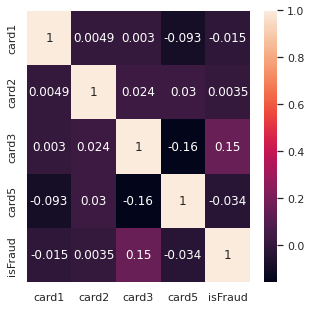

In [125]:
sns.heatmap(new_df.corr(),annot=True)

#### addr1 and addr2

In [126]:
df.addr1.isna().sum()

65706

In [127]:
df.addr2.isna().sum()

65706

In [128]:
s = df.addr1.value_counts(normalize=True)
missing = df['addr1'].isnull()
#filling null values according to original distribution
df.loc[missing,'addr1'] = np.random.choice(s.index, size=len(df[missing]),p=s.values)

In [129]:
#filling null value with mode
df["addr2"].fillna(df["addr2"].mode()[0],inplace=True)

In [130]:
new_df = df[['addr1','addr2','isFraud']].copy()

<AxesSubplot:>

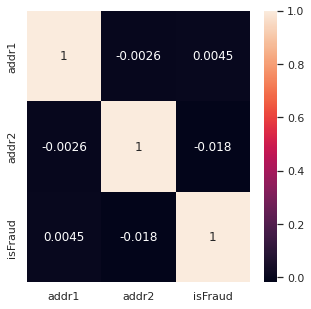

In [131]:
sns.heatmap(new_df.corr(),annot=True)

#### dist1

In [132]:
print(df.dist1.isna().sum())

352271


<AxesSubplot:xlabel='dist1', ylabel='Count'>

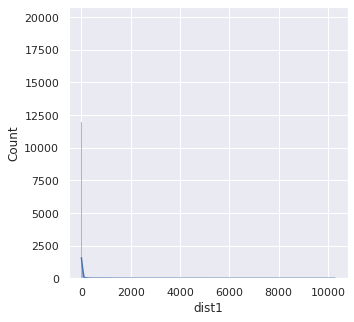

In [133]:
sns.histplot(df["dist1"],kde=True)

In [134]:
df['dist1'].mode()[0]

0.0

In [135]:
df["dist1"].fillna(df['dist1'].mode()[0],inplace=True)

#### D1,D2,D3,D4,D5,D6,D8,D9,D10,D11,D12,D13,D14,D15

In [136]:
d_feature=[]
for column in df.columns:
    if "D" in column and len(column)<=3:
        d_feature.append(column)

In [137]:
d_feature

['D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15']

In [138]:
for i in d_feature:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [139]:
for i in d_feature:
    print(df[i].isna().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [140]:
d_feature.append("isFraud")

In [141]:
new_df = df[d_feature].copy()

In [142]:
corr_df=new_df.corr()

<AxesSubplot:>

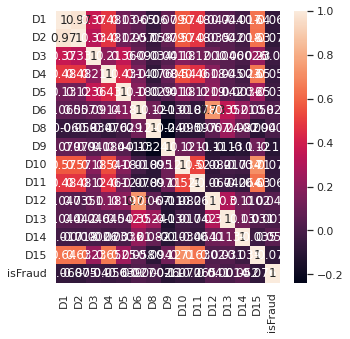

In [143]:
sns.heatmap(corr_df,annot=True)

#### C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14

In [144]:
new_df=df[["C1","C2","C3","C4","C5","C6","C7","C8","C9","C10","C11","C12","C13","C14","isFraud"]].copy()

In [145]:
# fig, axes = plt.subplots(14, 1, figsize=(15, 100), sharey=True)
# fig.suptitle('C features')
# sns.distplot(new_df["C1"],ax=axes[0],kde=True)
# sns.distplot(new_df["C2"],ax=axes[1],kde=True)
# sns.distplot(new_df["C3"],ax=axes[2],kde=True)
# sns.distplot(new_df["C4"],ax=axes[3],kde=True)
# sns.distplot(new_df["C5"],ax=axes[4],kde=True)
# sns.distplot(new_df["C6"],ax=axes[5],kde=True)
# sns.distplot(new_df["C7"],ax=axes[6],kde=True)
# sns.distplot(new_df["C8"],ax=axes[7],kde=True)
# sns.distplot(new_df["C9"],ax=axes[8],kde=True)
# sns.distplot(new_df["C10"],ax=axes[9],kde=True)
# sns.distplot(new_df["C11"],ax=axes[10],kde=True)
# sns.distplot(new_df["C12"],ax=axes[11],kde=True)
# sns.distplot(new_df["C13"],ax=axes[12],kde=True)
# sns.distplot(new_df["C14"],ax=axes[13],kde=True)

In [146]:
corr_df=new_df.corr()

<AxesSubplot:>

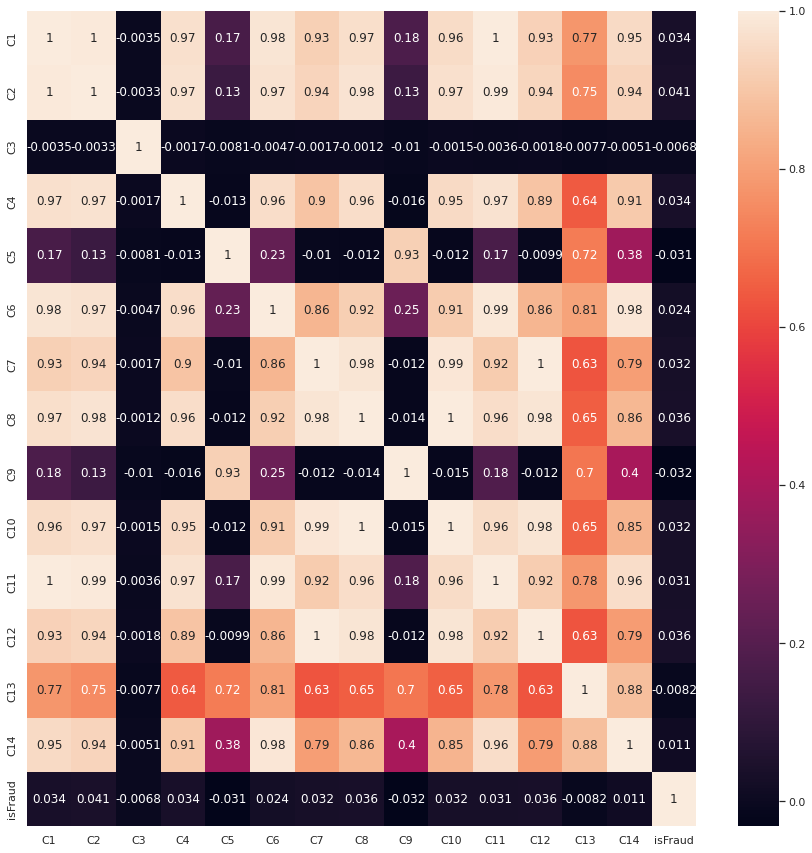

In [147]:
fig, axes = plt.subplots(1, 1, figsize=(15, 15), sharey=True)
sns.heatmap(corr_df,annot=True)

In [148]:
# # use at last on entire data set
# cor_matrix = corr_df.abs()
# upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
# to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
# print(to_drop)

#### Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.

In [149]:
v_feature=[]
for column in df.columns:
    if "V" in column:
        v_feature.append(column)

In [150]:
# fill missing value with data with mode of each column
for i in v_feature:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [151]:
v_feature.append("isFraud")

In [152]:
new_df=df[v_feature].copy()

#### 'id_01','id_02','id_03','id_04','id_05','id_06','id_09','id_10','id_11','id_13','id_14','id_17','id_19','id_20','id_32'

In [153]:
id_feature=['id_01','id_02','id_03','id_04','id_05','id_06','id_09','id_10','id_11','id_13','id_14','id_17','id_19','id_20','id_32']

In [154]:
for i in id_feature:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [155]:
corr_df=df.corr()

In [156]:
fig, axes = plt.subplots(1, 1, figsize=(258, 258), sharey=True)
sns.heatmap(corr_df)

<AxesSubplot:>

In [157]:
# use at last on entire data set
cor_matrix = corr_df.abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
print(to_drop)

['TransactionDT', 'C2', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C14', 'D2', 'V5', 'V11', 'V13', 'V16', 'V18', 'V20', 'V21', 'V22', 'V28', 'V30', 'V31', 'V32', 'V33', 'V34', 'V36', 'V40', 'V43', 'V45', 'V49', 'V50', 'V51', 'V52', 'V54', 'V57', 'V58', 'V60', 'V63', 'V64', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V76', 'V79', 'V81', 'V84', 'V85', 'V90', 'V91', 'V92', 'V93', 'V94', 'V96', 'V97', 'V101', 'V102', 'V103', 'V105', 'V106', 'V113', 'V126', 'V127', 'V128', 'V132', 'V133', 'V134', 'V137', 'V140', 'V143', 'V145', 'V147', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V163', 'V164', 'V167', 'V168', 'V177', 'V178', 'V179', 'V182', 'V183', 'V190', 'V192', 'V193', 'V196', 'V197', 'V198', 'V199', 'V201', 'V202', 'V203', 'V204', 'V207', 'V211', 'V212', 'V213', 'V216', 'V218', 'V219', 'V222', 'V225', 'V231', 'V232', 'V233', 'V236', 'V237', 'V239', 'V243', 'V244', 'V249', 'V251', 'V253', 'V254', 'V256', 'V257', 'V259', 'V265',

In [158]:
len(to_drop)

177

In [159]:
df.drop(to_drop,axis=1,inplace=True)

In [160]:
train_df=df.iloc[:442905,:]
test_df=df.iloc[442905:,:]
train_df.drop("TransactionID",axis=1,inplace=True)
test_df.drop(["TransactionID","isFraud"],axis=1,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [161]:
test_df.head()

TransactionAmt  card1  card2  card3  card5  addr1  addr2  dist1   C1   C3  \
0      325.000000  12932  361.0  150.0  226.0  126.0   87.0   24.0  3.0  0.0   
1       37.257000  14276  177.0  185.0  137.0  126.0   87.0    0.0  0.0  0.0   
2      100.000000  16506  554.0  150.0  226.0  299.0   87.0    0.0  1.0  0.0   
3       57.950001   9500  321.0  150.0  226.0  441.0   87.0  295.0  1.0  0.0   
4       34.257999  15885  545.0  185.0  138.0  284.0   60.0    0.0  1.0  0.0   

    C5  C13    D1    D3   D4   D5   D6        D8        D9    D10   D11  D12  \
0  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.791666  0.791666  166.0   0.0  0.0   
1  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.791666  0.791666    0.0   0.0  0.0   
2  0.0  1.0   0.0   0.0  0.0  0.0  0.0  0.791666  0.791666    0.0   0.0  0.0   
3  1.0  2.0  35.0  35.0  0.0  0.0  0.0  0.791666  0.791666   35.0  35.0  0.0   
4  0.0  1.0   0.0   0.0  0.0  0.0  0.0  0.791666  0.791666    0.0   0.0  0.0   

   D13    D14    D15  M1  M2  M3  M5  M6  M7  M8  M9   V1   V2   V3   V4   V6  \
0  0.0    0.0  166.0   1   1   1   1   1   0   0   1  1.0  1.0  1.0  1.0  1.0   
1  0.0  427.0    0.0   1   1   1   1   0   1   0   1  1.0  1.0  1.0  1.0  1.0   
2  0.0    0.0    0.0   1   1   1   1   1   0   0   1  1.0  1.0  1.0  1.0  1.0   
3  0.0    0.0   35.0   1   1   1   0   0   0   0   0  1.0  1.0  1.0  1.0  1.0   
4  0.0    0.0    0.0   1   0   1   0   0   0   1   1  1.0  1.0  1.0  1.0  1.0   

    V7   V8   V9  V10  V12  V14  V15  V17  V19  V23  V24  V25  V26  V27  V29  \
0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0   
1  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0   
2  1.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0   
3  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0   
4  1.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0   

   V35  V37  V38  V39  V41  V42  V44  V46  V47  V48  V53  V55  V56  V59  V61  \
0  1.0  1.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0   
1  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  1.0   
2  1.0  1.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  1.0   
3  1.0  1.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0   
4  0.0  1.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  1.0   

   V62  V65  V66  V67  V68  V75  V77  V78  V80  V82  V83  V86  V87  V88  V89  \
0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0   
1  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0   
2  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0   
3  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0   
4  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0   

   V95  V98  V99  V100  V104  V107  V108  V109  V110  V111  V112  V114  V115  \
0  1.0  0.0  0.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
1  0.0  0.0  0.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
2  0.0  0.0  0.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
3  0.0  0.0  0.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
4  0.0  0.0  0.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   

   V116  V117  V118  V119  V120  V121  V122  V123  V124  V125  V129  V130  \
0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   0.0   0.0   
1   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   0.0   0.0   
2   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   0.0   0.0   
3   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   0.0   0.0   
4   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   0.0   0.0   

   V131  V135  V136  V138  V139  V141  V142  V144  V146  V148  V161  V162  \
0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   
1   0.0   0.0

In [162]:
#export 
train_df.to_csv("./Train_without_Data_balancing_90null_without_drop.csv")

In [163]:
test_df.to_csv("./Test_without_Data_balancing_90null_without_drop.csv")

In [164]:
Train_target_df=train_df.loc[:,"isFraud"]
train_df.drop("isFraud",axis=1,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [165]:
train_df.head(10)

TransactionAmt  card1  card2  card3  card5  addr1  addr2  dist1    C1   C3  \
0       49.000000   5033  269.0  150.0  224.0  330.0   87.0    6.0   2.0  0.0   
1       57.950001   4527  376.0  150.0  226.0  441.0   87.0    0.0   2.0  0.0   
2      115.949997   2772  512.0  150.0  226.0  143.0   87.0   14.0   2.0  0.0   
3      100.000000  14290  512.0  150.0  226.0  177.0   87.0    0.0   1.0  0.0   
4       95.000000  12839  321.0  150.0  226.0  220.0   87.0    6.0  84.0  0.0   
5       51.000000  15344  321.0  150.0  226.0  310.0   87.0   17.0   1.0  0.0   
6       12.826000  15885  545.0  185.0  138.0  299.0   87.0    0.0   1.0  0.0   
7      189.949997  17131  111.0  150.0  224.0  264.0   87.0    0.0   2.0  0.0   
8       52.587002   9633  296.0  185.0  138.0  204.0   87.0    0.0   1.0  0.0   
9      107.949997  16255  470.0  150.0  137.0  143.0   87.0    0.0   1.0  0.0   

      C5    C13     D1    D3     D4    D5   D6          D8        D9    D10  \
0    0.0   21.0   14.0   9.0  370.0   9.0  0.0    0.791666  0.791666   14.0   
1    1.0   14.0  136.0   8.0  136.0   8.0  0.0    0.791666  0.791666  136.0   
2    1.0   14.0  193.0   0.0  495.0   0.0  0.0    0.791666  0.791666  495.0   
3    0.0    1.0    0.0   0.0    0.0   0.0  0.0  754.625000  0.625000    0.0   
4  142.0  483.0   35.0   1.0  566.0   1.0  0.0    0.791666  0.791666   76.0   
5    1.0    3.0   17.0   3.0   17.0   3.0  0.0    0.791666  0.791666   17.0   
6    0.0    1.0    0.0   0.0    0.0   0.0  0.0    0.791666  0.791666    0.0   
7    1.0    3.0   60.0  60.0   90.0  60.0  0.0    0.791666  0.791666   90.0   
8    0.0    1.0    0.0   0.0    0.0   0.0  0.0    0.791666  0.791666    0.0   
9    1.0    1.0    0.0   0.0    0.0   0.0  0.0    0.791666  0.791666    0.0   

     D11  D12  D13  D14    D15  M1  M2  M3  M5  M6  M7  M8  M9   V1   V2   V3  \
0  351.0  0.0  0.0  0.0  375.0   1   1   1   1   0   0   0   0  1.0  1.0  1.0   
1    0.0  0.0  0.0  0.0  136.0   1   1   1   1   0   0   0   1  1.0  1.0  1.0   
2  495.0  0.0  0.0  0.0  495.0   1   1   1   0   1   0   0   1  1.0  1.0  1.0   
3    0.0  0.0  0.0  0.0    0.0   1   1   1   0   0   0   0   1  1.0  1.0  1.0   
4  559.0  0.0  0.0  0.0  559.0   1   1   1   0   0   0   1   1  1.0  1.0  1.0   
5   17.0  0.0  0.0  0.0   17.0   1   1   1   1   0   0   0   1  1.0  1.0  1.0   
6    0.0  0.0  0.0  0.0    0.0   1   1   1   0   1   0   1   1  1.0  1.0  1.0   
7    0.0  0.0  0.0  0.0   90.0   1   1   1   1   1   0   0   1  1.0  1.0  1.0   
8    0.0  0.0  0.0  0.0    0.0   1   1   1   1   0   0   0   1  1.0  1.0  1.0   
9    0.0  0.0  0.0  0.0    0.0   1   1   1   0   1   0   0   1  1.0  1.0  1.0   

    V4   V6   V7   V8   V9  V10  V12  V14  V15  V17  V19  V23  V24  V25  V26  \
0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0   
1  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0   
2  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0   
3  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0   
4  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0   
5  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0   
6  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
7  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0   
8  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
9  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0   

   V27  V29  V35  V37  V38  V39  V41  V42  V44  V46  V47  V48  V53  V55  V56  \
0  0.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0   
1  0.0  1.0  1.0  1.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
2  0.0  1.0  1.0  1.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
3  0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0   
4  0.0  1.0  0.0  1.0  1.0  0.0  1.0  0.0  1.0  1.0  2.0  1.0  0.0  

In [166]:
test_df.head()

TransactionAmt  card1  card2  card3  card5  addr1  addr2  dist1   C1   C3  \
0      325.000000  12932  361.0  150.0  226.0  126.0   87.0   24.0  3.0  0.0   
1       37.257000  14276  177.0  185.0  137.0  126.0   87.0    0.0  0.0  0.0   
2      100.000000  16506  554.0  150.0  226.0  299.0   87.0    0.0  1.0  0.0   
3       57.950001   9500  321.0  150.0  226.0  441.0   87.0  295.0  1.0  0.0   
4       34.257999  15885  545.0  185.0  138.0  284.0   60.0    0.0  1.0  0.0   

    C5  C13    D1    D3   D4   D5   D6        D8        D9    D10   D11  D12  \
0  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.791666  0.791666  166.0   0.0  0.0   
1  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.791666  0.791666    0.0   0.0  0.0   
2  0.0  1.0   0.0   0.0  0.0  0.0  0.0  0.791666  0.791666    0.0   0.0  0.0   
3  1.0  2.0  35.0  35.0  0.0  0.0  0.0  0.791666  0.791666   35.0  35.0  0.0   
4  0.0  1.0   0.0   0.0  0.0  0.0  0.0  0.791666  0.791666    0.0   0.0  0.0   

   D13    D14    D15  M1  M2  M3  M5  M6  M7  M8  M9   V1   V2   V3   V4   V6  \
0  0.0    0.0  166.0   1   1   1   1   1   0   0   1  1.0  1.0  1.0  1.0  1.0   
1  0.0  427.0    0.0   1   1   1   1   0   1   0   1  1.0  1.0  1.0  1.0  1.0   
2  0.0    0.0    0.0   1   1   1   1   1   0   0   1  1.0  1.0  1.0  1.0  1.0   
3  0.0    0.0   35.0   1   1   1   0   0   0   0   0  1.0  1.0  1.0  1.0  1.0   
4  0.0    0.0    0.0   1   0   1   0   0   0   1   1  1.0  1.0  1.0  1.0  1.0   

    V7   V8   V9  V10  V12  V14  V15  V17  V19  V23  V24  V25  V26  V27  V29  \
0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0   
1  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0   
2  1.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0   
3  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0   
4  1.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0   

   V35  V37  V38  V39  V41  V42  V44  V46  V47  V48  V53  V55  V56  V59  V61  \
0  1.0  1.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0   
1  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  1.0   
2  1.0  1.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  1.0   
3  1.0  1.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0   
4  0.0  1.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  1.0   

   V62  V65  V66  V67  V68  V75  V77  V78  V80  V82  V83  V86  V87  V88  V89  \
0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0   
1  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0   
2  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0   
3  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0   
4  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0   

   V95  V98  V99  V100  V104  V107  V108  V109  V110  V111  V112  V114  V115  \
0  1.0  0.0  0.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
1  0.0  0.0  0.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
2  0.0  0.0  0.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
3  0.0  0.0  0.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
4  0.0  0.0  0.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   

   V116  V117  V118  V119  V120  V121  V122  V123  V124  V125  V129  V130  \
0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   0.0   0.0   
1   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   0.0   0.0   
2   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   0.0   0.0   
3   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   0.0   0.0   
4   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   0.0   0.0   

   V131  V135  V136  V138  V139  V141  V142  V144  V146  V148  V161  V162  \
0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   
1   0.0   0.0

In [167]:
Train_target_df.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: isFraud, dtype: float32

In [168]:
test_df.head()

TransactionAmt  card1  card2  card3  card5  addr1  addr2  dist1   C1   C3  \
0      325.000000  12932  361.0  150.0  226.0  126.0   87.0   24.0  3.0  0.0   
1       37.257000  14276  177.0  185.0  137.0  126.0   87.0    0.0  0.0  0.0   
2      100.000000  16506  554.0  150.0  226.0  299.0   87.0    0.0  1.0  0.0   
3       57.950001   9500  321.0  150.0  226.0  441.0   87.0  295.0  1.0  0.0   
4       34.257999  15885  545.0  185.0  138.0  284.0   60.0    0.0  1.0  0.0   

    C5  C13    D1    D3   D4   D5   D6        D8        D9    D10   D11  D12  \
0  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.791666  0.791666  166.0   0.0  0.0   
1  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.791666  0.791666    0.0   0.0  0.0   
2  0.0  1.0   0.0   0.0  0.0  0.0  0.0  0.791666  0.791666    0.0   0.0  0.0   
3  1.0  2.0  35.0  35.0  0.0  0.0  0.0  0.791666  0.791666   35.0  35.0  0.0   
4  0.0  1.0   0.0   0.0  0.0  0.0  0.0  0.791666  0.791666    0.0   0.0  0.0   

   D13    D14    D15  M1  M2  M3  M5  M6  M7  M8  M9   V1   V2   V3   V4   V6  \
0  0.0    0.0  166.0   1   1   1   1   1   0   0   1  1.0  1.0  1.0  1.0  1.0   
1  0.0  427.0    0.0   1   1   1   1   0   1   0   1  1.0  1.0  1.0  1.0  1.0   
2  0.0    0.0    0.0   1   1   1   1   1   0   0   1  1.0  1.0  1.0  1.0  1.0   
3  0.0    0.0   35.0   1   1   1   0   0   0   0   0  1.0  1.0  1.0  1.0  1.0   
4  0.0    0.0    0.0   1   0   1   0   0   0   1   1  1.0  1.0  1.0  1.0  1.0   

    V7   V8   V9  V10  V12  V14  V15  V17  V19  V23  V24  V25  V26  V27  V29  \
0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0   
1  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0   
2  1.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0   
3  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0   
4  1.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0   

   V35  V37  V38  V39  V41  V42  V44  V46  V47  V48  V53  V55  V56  V59  V61  \
0  1.0  1.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0   
1  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  1.0   
2  1.0  1.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  1.0   
3  1.0  1.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0   
4  0.0  1.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  1.0   

   V62  V65  V66  V67  V68  V75  V77  V78  V80  V82  V83  V86  V87  V88  V89  \
0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0   
1  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0   
2  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0   
3  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0   
4  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0   

   V95  V98  V99  V100  V104  V107  V108  V109  V110  V111  V112  V114  V115  \
0  1.0  0.0  0.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
1  0.0  0.0  0.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
2  0.0  0.0  0.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
3  0.0  0.0  0.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
4  0.0  0.0  0.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   

   V116  V117  V118  V119  V120  V121  V122  V123  V124  V125  V129  V130  \
0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   0.0   0.0   
1   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   0.0   0.0   
2   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   0.0   0.0   
3   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   0.0   0.0   
4   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   0.0   0.0   

   V131  V135  V136  V138  V139  V141  V142  V144  V146  V148  V161  V162  \
0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   
1   0.0   0.0

In [169]:
train_df.head()

TransactionAmt  card1  card2  card3  card5  addr1  addr2  dist1    C1   C3  \
0       49.000000   5033  269.0  150.0  224.0  330.0   87.0    6.0   2.0  0.0   
1       57.950001   4527  376.0  150.0  226.0  441.0   87.0    0.0   2.0  0.0   
2      115.949997   2772  512.0  150.0  226.0  143.0   87.0   14.0   2.0  0.0   
3      100.000000  14290  512.0  150.0  226.0  177.0   87.0    0.0   1.0  0.0   
4       95.000000  12839  321.0  150.0  226.0  220.0   87.0    6.0  84.0  0.0   

      C5    C13     D1   D3     D4   D5   D6          D8        D9    D10  \
0    0.0   21.0   14.0  9.0  370.0  9.0  0.0    0.791666  0.791666   14.0   
1    1.0   14.0  136.0  8.0  136.0  8.0  0.0    0.791666  0.791666  136.0   
2    1.0   14.0  193.0  0.0  495.0  0.0  0.0    0.791666  0.791666  495.0   
3    0.0    1.0    0.0  0.0    0.0  0.0  0.0  754.625000  0.625000    0.0   
4  142.0  483.0   35.0  1.0  566.0  1.0  0.0    0.791666  0.791666   76.0   

     D11  D12  D13  D14    D15  M1  M2  M3  M5  M6  M7  M8  M9   V1   V2   V3  \
0  351.0  0.0  0.0  0.0  375.0   1   1   1   1   0   0   0   0  1.0  1.0  1.0   
1    0.0  0.0  0.0  0.0  136.0   1   1   1   1   0   0   0   1  1.0  1.0  1.0   
2  495.0  0.0  0.0  0.0  495.0   1   1   1   0   1   0   0   1  1.0  1.0  1.0   
3    0.0  0.0  0.0  0.0    0.0   1   1   1   0   0   0   0   1  1.0  1.0  1.0   
4  559.0  0.0  0.0  0.0  559.0   1   1   1   0   0   0   1   1  1.0  1.0  1.0   

    V4   V6   V7   V8   V9  V10  V12  V14  V15  V17  V19  V23  V24  V25  V26  \
0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0   
1  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0   
2  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0   
3  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0   
4  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0   

   V27  V29  V35  V37  V38  V39  V41  V42  V44  V46  V47  V48  V53  V55  V56  \
0  0.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0   
1  0.0  1.0  1.0  1.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
2  0.0  1.0  1.0  1.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
3  0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0   
4  0.0  1.0  0.0  1.0  1.0  0.0  1.0  0.0  1.0  1.0  2.0  1.0  0.0  1.0  1.0   

   V59  V61  V62  V65  V66  V67  V68  V75  V77  V78  V80  V82  V83  V86  V87  \
0  0.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  1.0  2.0  1.0  1.0   
1  0.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0   
2  0.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0   
3  0.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
4  0.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0   

   V88  V89  V95  V98  V99  V100  V104  V107  V108  V109  V110  V111  V112  \
0  1.0  0.0  0.0  0.0  2.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   
1  1.0  0.0  0.0  0.0  4.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   
2  1.0  0.0  1.0  0.0  0.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
3  1.0  0.0  0.0  0.0  0.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   
4  1.0  0.0  1.0  1.0  3.0   2.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   

   V114  V115  V116  V117  V118  V119  V120  V121  V122  V123  V124  V125  \
0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
1   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
2   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
3   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
4   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   

   V129        V130       V131        V135        V136  V138  V139  V141  \
0   0.0   98.000000   0.000000    0.000000    0.000000   0.0   1.0   0.0   
1   0.0  229.800003   0.000000    0.000

In [170]:
x_train_df=train_df
y_train_df=Train_target_df

In [171]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train_df, y_train_df, test_size=0.20, random_state=0)

In [172]:
from sklearn import metrics

### LogisticRegression


In [173]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

In [174]:
logisticRegr.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [175]:
predictions = logisticRegr.predict(x_test)

In [176]:
score=metrics.accuracy_score(y_test, predictions)
print(score)

0.964089364536413


In [177]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[85388    41]
 [ 3140    12]]


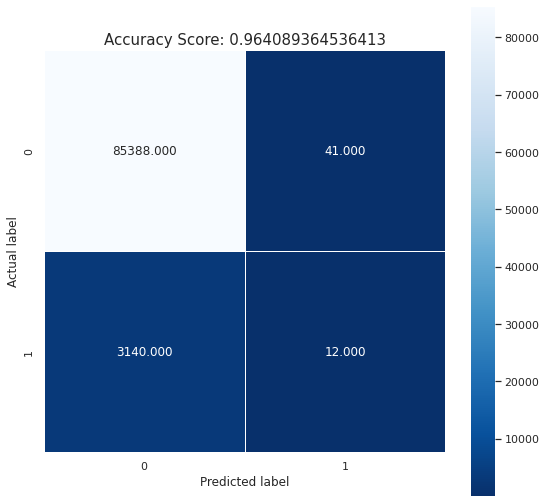

In [178]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

#### ROC curve for logistic regression


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


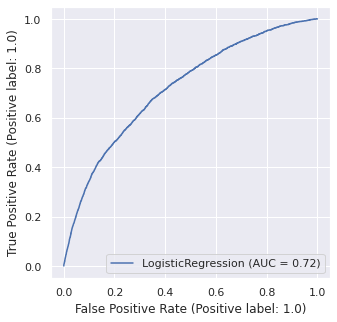

In [179]:
metrics.plot_roc_curve(logisticRegr, x_test, y_test) 

In [180]:
fpr, tpr, thresholds=metrics.roc_curve(y_test,predictions)
# auc score
metrics.auc(fpr, tpr)

0.501663587948148

### Decision Tree

In [181]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [182]:
predictions = clf.predict(x_test)

In [183]:
score=metrics.accuracy_score(y_test, predictions)
print(score)

0.9642587010758514


In [184]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[83708  1721]
 [ 1445  1707]]


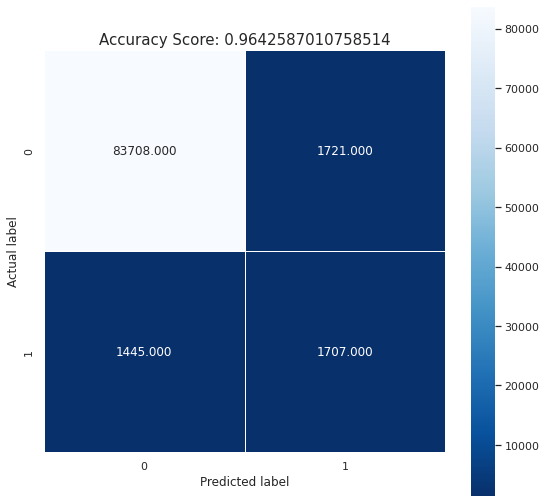

In [185]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

#### ROC curve for decision tree

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


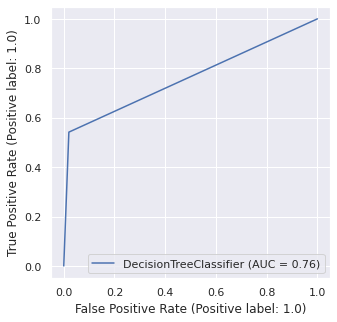

In [186]:
metrics.plot_roc_curve(clf, x_test, y_test) 

In [187]:
fpr, tpr, thresholds=metrics.roc_curve(y_test,predictions)
# auc score
metrics.auc(fpr, tpr)

0.7607077649097749

### Random Forest

In [188]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)

In [189]:
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)


In [190]:
score=metrics.accuracy_score(y_test, predictions)
print(score)

0.9782797665413576


Text(0.5, 1.0, 'Accuracy Score: 0.9782797665413576')

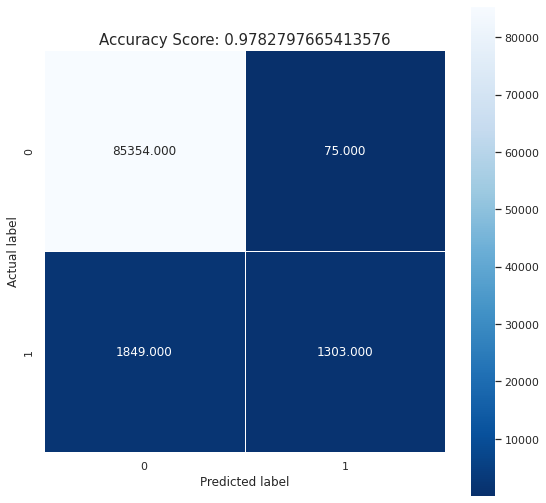

In [191]:
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

#### ROC curve for Random forest




/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


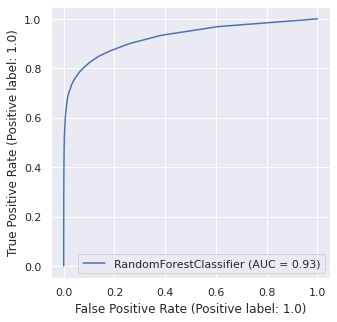

In [192]:
metrics.plot_roc_curve(clf, x_test, y_test) 

In [193]:
fpr, tpr, thresholds=metrics.roc_curve(y_test,predictions)
# auc score
metrics.auc(fpr, tpr)

0.7062552014279915